### Istalling and importing neccessary libraries

In [3]:
!pip install beautifulsoup4 --quiet

In [72]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#specify the url we want to scrape from
Link = "https://en.wikipedia.org/wiki/Serena_Williams_career_statistics"
#convert the web page to text
Link_text = requests.get(Link).text
print(Link_text)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Serena Williams career statistics - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4e559432-5f81-47b1-b284-a8e2674be7a6","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Serena_Williams_career_statistics","wgTitle":"Serena Williams career statistics","wgCurRevisionId":1128211834,"wgRevisionId":1128211834,"wgArticleId":22518807,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Articles containing p

In [5]:
#to convert Link_text into a BeautifulSoup Object
soup = bs(Link_text, 'lxml')
print(soup)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Serena Williams career statistics - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4e559432-5f81-47b1-b284-a8e2674be7a6","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Serena_Williams_career_statistics","wgTitle":"Serena Williams career statistics","wgCurRevisionId":1128211834,"wgRevisionId":1128211834,"wgArticleId":22518807,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Articles containing p

In [6]:
#make the indentation proper
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Serena Williams career statistics - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4e559432-5f81-47b1-b284-a8e2674be7a6","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Serena_Williams_career_statistics","wgTitle":"Serena Williams career statistics","wgCurRevisionId":1128211834,"wgRevisionId":1128211834,"wgArticleId":22518807,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Art

In [7]:
#Only the string not the tags
print(soup.title.string)

Serena Williams career statistics - Wikipedia


In [8]:
#First <a></a> tag
soup.a

<a id="top"></a>

In [9]:
#all the <a> </a> tags
soup.find_all('a')

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a class="image" href="/wiki/File:Serena_Williams_at_the_Australian_Open_2015.jpg"><img alt="" class="thumbimage" data-file-height="3500" data-file-width="2498" decoding="async" height="350" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Serena_Williams_at_the_Australian_Open_2015.jpg/250px-Serena_Williams_at_the_Australian_Open_2015.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Serena_Williams_at_the_Australian_Open_2015.jpg/375px-Serena_Williams_at_the_Australian_Open_2015.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/27/Serena_Williams_at_the_Australian_Open_2015.jpg/500px-Serena_Williams_at_the_Australian_Open_2015.jpg 2x" width="250"/></a>,
 <a class="internal" href="/wiki/File:Serena_Williams_at_the_Australian_Open_2015.jpg" title="Enlarge"></a>,
 <a href="/wiki/Tennis" title="Tennis">tennis

In [10]:
#fetch all the table tags with class name="infobox vcard vevent nowrap"
our_table = soup.find('table', class_= 'infobox vcard vevent nowrap')
print(our_table)

<table class="infobox vcard vevent nowrap" width="40%">
<tbody><tr bgcolor="ffffcc">
<th colspan="6"><div class="center" style="width:auto; margin-left:auto; margin-right:auto;">Career finals</div>
</th></tr>
<tr>
<th>Discipline</th>
<th>Type</th>
<th>Won</th>
<th>Lost</th>
<th>Total</th>
<th>WR
</th></tr>
<tr>
<td rowspan="7">Singles</td>
<td>Grand Slam</td>
<td>23</td>
<td>10</td>
<td bgcolor="CCCCFF">33</td>
<td>0.70
</td></tr>
<tr>
<td>Summer Olympics</td>
<td>1</td>
<td>–</td>
<td bgcolor="CCCCFF">1</td>
<td>1.00
</td></tr>
<tr>
<td>WTA Tour Championships</td>
<td>5</td>
<td>2</td>
<td bgcolor="CCCCFF">7</td>
<td>0.71
</td></tr>
<tr>
<td>Grand Slam Cup</td>
<td>1</td>
<td>–</td>
<td bgcolor="CCCCFF">1</td>
<td>1.00
</td></tr>
<tr>
<td>WTA 1000*</td>
<td>23</td>
<td>10</td>
<td bgcolor="CCCCFF">33</td>
<td>0.70
</td></tr>
<tr>
<td>WTA Tour</td>
<td>20</td>
<td>3</td>
<td bgcolor="CCCCFF">23</td>
<td>0.87
</td></tr>
<tr bgcolor="98FB98">
<td>Total</td>
<td>73</td>
<td>25</td>
<td>98

In [11]:
# To extract the table rows of the info you have decided to extract

our_table.find_all('tr')

# renaming the variable

table_rows = our_table.find_all('tr')

In [12]:
# FOR LOOP is used to iterate the rows

for row in table_rows:
    print(row.prettify())

<tr bgcolor="ffffcc">
 <th colspan="6">
  <div class="center" style="width:auto; margin-left:auto; margin-right:auto;">
   Career finals
  </div>
 </th>
</tr>

<tr>
 <th>
  Discipline
 </th>
 <th>
  Type
 </th>
 <th>
  Won
 </th>
 <th>
  Lost
 </th>
 <th>
  Total
 </th>
 <th>
  WR
 </th>
</tr>

<tr>
 <td rowspan="7">
  Singles
 </td>
 <td>
  Grand Slam
 </td>
 <td>
  23
 </td>
 <td>
  10
 </td>
 <td bgcolor="CCCCFF">
  33
 </td>
 <td>
  0.70
 </td>
</tr>

<tr>
 <td>
  Summer Olympics
 </td>
 <td>
  1
 </td>
 <td>
  –
 </td>
 <td bgcolor="CCCCFF">
  1
 </td>
 <td>
  1.00
 </td>
</tr>

<tr>
 <td>
  WTA Tour Championships
 </td>
 <td>
  5
 </td>
 <td>
  2
 </td>
 <td bgcolor="CCCCFF">
  7
 </td>
 <td>
  0.71
 </td>
</tr>

<tr>
 <td>
  Grand Slam Cup
 </td>
 <td>
  1
 </td>
 <td>
  –
 </td>
 <td bgcolor="CCCCFF">
  1
 </td>
 <td>
  1.00
 </td>
</tr>

<tr>
 <td>
  WTA 1000*
 </td>
 <td>
  23
 </td>
 <td>
  10
 </td>
 <td bgcolor="CCCCFF">
  33
 </td>
 <td>
  0.70
 </td>
</tr>

<tr>
 <td>
  

In [13]:
for row in table_rows:
    row_td =row.find_all('td')
    print(row_td)
    type(row_td)

[]
[]
[<td rowspan="7">Singles</td>, <td>Grand Slam</td>, <td>23</td>, <td>10</td>, <td bgcolor="CCCCFF">33</td>, <td>0.70
</td>]
[<td>Summer Olympics</td>, <td>1</td>, <td>–</td>, <td bgcolor="CCCCFF">1</td>, <td>1.00
</td>]
[<td>WTA Tour Championships</td>, <td>5</td>, <td>2</td>, <td bgcolor="CCCCFF">7</td>, <td>0.71
</td>]
[<td>Grand Slam Cup</td>, <td>1</td>, <td>–</td>, <td bgcolor="CCCCFF">1</td>, <td>1.00
</td>]
[<td>WTA 1000*</td>, <td>23</td>, <td>10</td>, <td bgcolor="CCCCFF">33</td>, <td>0.70
</td>]
[<td>WTA Tour</td>, <td>20</td>, <td>3</td>, <td bgcolor="CCCCFF">23</td>, <td>0.87
</td>]
[<td>Total</td>, <td>73</td>, <td>25</td>, <td>98</td>, <td>0.74
</td>]
[<td rowspan="6">Doubles</td>, <td>Grand Slam</td>, <td>14</td>, <td>–</td>, <td bgcolor="CCCCFF">14</td>, <td>1.00
</td>]
[<td>Summer Olympics</td>, <td>3</td>, <td>–</td>, <td bgcolor="CCCCFF">3</td>, <td>1.00
</td>]
[<td>WTA Tour Championships</td>, <td>–</td>, <td>–</td>, <td bgcolor="CCCCFF">–</td>, <td>–
</td>]
[

In [14]:
str_cells = str(row_td)
cleantext = bs(str_cells, "lxml").get_text()
print(cleantext)

[1) WR = winning rate2) * formerly known as Tier I tournaments from 1990 to 2008 and  Premier Mandatory & Premier 5 tournaments from 2009 to 2020.
]


In [15]:
import re

list_rows = []
for row in table_rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[1) WR = winning rate2) * formerly known as Tier I tournaments from 1990 to 2008 and  Premier Mandatory &amp; Premier 5 tournaments from 2009 to 2020.
]


str

### DataFrames

In [20]:
t = pd.DataFrame(list_rows)
t.head(10)

0
0                                         []
1                                         []
2  [Singles, Grand Slam, 23, 10, 33, 0.70\n]
3         [Summer Olympics, 1, –, 1, 1.00\n]
4  [WTA Tour Championships, 5, 2, 7, 0.71\n]
5          [Grand Slam Cup, 1, –, 1, 1.00\n]
6            [WTA 1000*, 23, 10, 33, 0.70\n]
7              [WTA Tour, 20, 3, 23, 0.87\n]
8                [Total, 73, 25, 98, 0.74\n]
9   [Doubles, Grand Slam, 14, –, 14, 1.00\n]

In [21]:
df1 = t[0].str.split(',', expand=True)
df1.head(10)

0            1     2     3         4         5
0                       []         None  None  None      None      None
1                       []         None  None  None      None      None
2                 [Singles   Grand Slam    23    10        33   0.70\n]
3         [Summer Olympics            1     –     1   1.00\n]      None
4  [WTA Tour Championships            5     2     7   0.71\n]      None
5          [Grand Slam Cup            1     –     1   1.00\n]      None
6               [WTA 1000*           23    10    33   0.70\n]      None
7                [WTA Tour           20     3    23   0.87\n]      None
8                   [Total           73    25    98   0.74\n]      None
9                 [Doubles   Grand Slam    14     –        14   1.00\n]

In [22]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

0            1     2     3         4         5
0                       ]         None  None  None      None      None
1                       ]         None  None  None      None      None
2                 Singles   Grand Slam    23    10        33   0.70\n]
3         Summer Olympics            1     –     1   1.00\n]      None
4  WTA Tour Championships            5     2     7   0.71\n]      None
5          Grand Slam Cup            1     –     1   1.00\n]      None
6               WTA 1000*           23    10    33   0.70\n]      None
7                WTA Tour           20     3    23   0.87\n]      None
8                   Total           73    25    98   0.74\n]      None
9                 Doubles   Grand Slam    14     –        14   1.00\n]

In [19]:
# using pandas to get other tables from the website

In [23]:
df = pd.read_html('https://en.wikipedia.org/wiki/Serena_Williams_career_statistics')

In [28]:
df2 = df[0]
df2


Career finals  \
                                           Discipline   
0                                             Singles   
1                                             Singles   
2                                             Singles   
3                                             Singles   
4                                             Singles   
5                                             Singles   
6                                             Singles   
7                                             Doubles   
8                                             Doubles   
9                                             Doubles   
10                                            Doubles   
11                                            Doubles   
12                                            Doubles   
13                                      Mixed doubles   
14                                      Mixed doubles   
15                                              Total   
16  1) WR = winning rate2) * formerly known as Tie...   

                                                       \
                                                 Type   
0                                          Grand Slam   
1                                     Summer Olympics   
2                              WTA Tour Championships   
3                                      Grand Slam Cup   
4                                           WTA 1000*   
5                                            WTA Tour   
6                                               Total   
7                                          Grand Slam   
8                                     Summer Olympics   
9                              WTA Tour Championships   
10                                          WTA 1000*   
11                                           WTA Tour   
12                                              Total   
13                                         Grand Slam   
14                                              Total   
15                                              Total   
16  1) WR = winning rate2) * formerly known as Tie...   

                                                       \
                                                  Won   
0                                                  23   
1                                                   1   
2                                                   5   
3                                                   1   
4                                                  23   
5                                                  20   
6                                                  73   
7                                                  14   
8                                                   3   
9                                                   –   
10                                                  2   
11                                                  4   
12                                                 23   
13                                                  2   
14                                                  2   
15                                                 98   
16  1) WR = winning rate2) * formerly known as Tie...   

                                                       \
                                                 Lost   
0                                                  10   
1                                                   –   
2                                                   2   
3                                                   –   
4                                                  10   
5                                                   3   
6                                                  25   
7                                                   –   
8                                                   –   
9                                                   –   
10                                                  –   
11                                             

In [29]:
df3 = df[5]
df3

Result  Year           Tournament Surface             Opponent  \
0     Win  1999              US Open    Hard       Martina Hingis   
1    Loss  2001              US Open    Hard       Venus Williams   
2     Win  2002          French Open    Clay       Venus Williams   
3     Win  2002            Wimbledon   Grass       Venus Williams   
4     Win  2002          US Open (2)    Hard       Venus Williams   
5     Win  2003      Australian Open    Hard       Venus Williams   
6     Win  2003        Wimbledon (2)   Grass       Venus Williams   
7    Loss  2004            Wimbledon   Grass      Maria Sharapova   
8     Win  2005  Australian Open (2)    Hard    Lindsay Davenport   
9     Win  2007  Australian Open (3)    Hard      Maria Sharapova   
10   Loss  2008            Wimbledon   Grass       Venus Williams   
11    Win  2008          US Open (3)    Hard      Jelena Janković   
12    Win  2009  Australian Open (4)    Hard        Dinara Safina   
13    Win  2009        Wimbledon (3)   Grass       Venus Williams   
14    Win  2010  Australian Open (5)    Hard        Justine Henin   
15    Win  2010        Wimbledon (4)   Grass       Vera Zvonareva   
16   Loss  2011              US Open    Hard      Samantha Stosur   
17    Win  2012        Wimbledon (5)   Grass  Agnieszka Radwańska   
18    Win  2012          US Open (4)    Hard    Victoria Azarenka   
19    Win  2013      French Open (2)    Clay      Maria Sharapova   
20    Win  2013          US Open (5)    Hard    Victoria Azarenka   
21    Win  2014          US Open (6)    Hard   Caroline Wozniacki   
22    Win  2015  Australian Open (6)    Hard      Maria Sharapova   
23    Win  2015      French Open (3)    Clay       Lucie Šafářová   
24    Win  2015        Wimbledon (6)   Grass     Garbiñe Muguruza   
25   Loss  2016      Australian Open    Hard     Angelique Kerber   
26   Loss  2016          French Open    Clay     Garbiñe Muguruza   
27    Win  2016        Wimbledon (7)   Grass     Angelique Kerber   
28    Win  2017  Australian Open (7)    Hard       Venus Williams   
29   Loss  2018            Wimbledon   Grass     Angelique Kerber   
30   Loss  2018              US Open    Hard          Naomi Osaka   
31   Loss  2019            Wimbledon   Grass         Simona Halep   
32   Loss  2019              US Open    Hard     Bianca Andreescu   

                 Score  
0        6–3, 7–6(7–4)  
1             2–6, 4–6  
2             7–5, 6–3  
3        7–6(7–4), 6–3  
4             6–4, 6–3  
5   7–6(7–4), 3–6, 6–4  
6        4–6, 6–4, 6–2  
7             1–6, 4–6  
8        2–6, 6–3, 6–0  
9             6–1, 6–2  
10            5–7, 4–6  
11            6–4, 7–5  
12            6–0, 6–3  
13       7–6(7–3), 6–2  
14       6–4, 3–6, 6–2  
15            6–3, 6–2  
16            2–6, 3–6  
17       6–1, 5–7, 6–2  
18       6–2, 2–6, 7–5  
19            6–4, 6–4  
20  7–5, 6–7(6–8), 6–1  
21            6–3, 6–3  
22       6–3, 7–6(7–5)  
23  6–3, 6–7(2–7), 6–2  
24            6–4, 6–4  
25       4–6, 6–3, 4–6  
26            5–7, 4–6  
27            7–5, 6–3  
28            6–4, 6–4  
29            3–6, 3–6  
30            2–6, 4–6  
31            2–6, 2–6  
32            3–6, 5–7

In [30]:
df4 = df[11]
df4

Result  Year             Tournament   Surface              Opponent  \
0     Win  1999      Indian Wells Open      Hard           Steffi Graf   
1    Loss  1999             Miami Open      Hard        Venus Williams   
2    Loss  2000          Canadian Open      Hard        Martina Hingis   
3     Win  2001  Indian Wells Open (2)      Hard         Kim Clijsters   
4     Win  2001          Canadian Open      Hard     Jennifer Capriati   
5     Win  2002             Miami Open      Hard     Jennifer Capriati   
6    Loss  2002            German Open      Clay         Justine Henin   
7     Win  2002           Italian Open      Clay         Justine Henin   
8     Win  2003         Miami Open (2)      Hard     Jennifer Capriati   
9    Loss  2003        Charleston Open      Clay         Justine Henin   
10    Win  2004         Miami Open (3)      Hard      Elena Dementieva   
11    Win  2007         Miami Open (4)      Hard         Justine Henin   
12   Loss  2007            Kremlin Cup  Hard (i)      Elena Dementieva   
13    Win  2008         Miami Open (5)      Hard       Jelena Janković   
14    Win  2008        Charleston Open      Clay        Vera Zvonareva   
15   Loss  2009         Miami Open (2)      Hard     Victoria Azarenka   
16    Win  2011      Canadian Open (2)      Hard       Samantha Stosur   
17    Win  2012            Madrid Open      Clay     Victoria Azarenka   
18   Loss  2013             Qatar Open      Hard     Victoria Azarenka   
19    Win  2013         Miami Open (6)      Hard       Maria Sharapova   
20    Win  2013        Madrid Open (2)      Clay       Maria Sharapova   
21    Win  2013       Italian Open (2)      Clay     Victoria Azarenka   
22    Win  2013      Canadian Open (3)      Hard        Sorana Cîrstea   
23   Loss  2013        Cincinnati Open      Hard     Victoria Azarenka   
24    Win  2013             China Open      Hard       Jelena Janković   
25    Win  2014         Miami Open (7)      Hard                 Li Na   
26    Win  2014       Italian Open (3)      Clay           Sara Errani   
27    Win  2014        Cincinnati Open      Hard          Ana Ivanovic   
28    Win  2015         Miami Open (8)      Hard  Carla Suárez Navarro   
29    Win  2015    Cincinnati Open (2)      Hard          Simona Halep   
30   Loss  2016      Indian Wells Open      Hard     Victoria Azarenka   
31    Win  2016       Italian Open (4)      Clay          Madison Keys   
32   Loss  2019          Canadian Open      Hard      Bianca Andreescu   

                 Score  
0        6–3, 3–6, 7–5  
1        1–6, 6–4, 4–6  
2   6–0, 3–6, 0–3 ret.  
3        4–6, 6–4, 6–2  
4   6–1, 6–7(7–9), 6–3  
5        7–5, 7–6(7–4)  
6   2–6, 6–1, 6–7(5–7)  
7        7–6(8–6), 6–4  
8        4–6, 6–4, 6–1  
9             3–6, 4–6  
10            6–1, 6–1  
11       0–6, 7–5, 6–3  
12       7–5, 1–6, 1–6  
13       6–1, 5–7, 6–3  
14       6–4, 3–6, 6–3  
15            3–6, 1–6  
16            6–4, 6–2  
17            6–1, 6–3  
18  6–7(6–8), 6–2, 3–6  
19       4–6, 6–3, 6–0  
20            6–1, 6–4  
21            6–1, 6–3  
22            6–2, 6–0  
23  6–2, 2–6, 6–7(6–8)  
24            6–2, 6–2  
25            7–5, 6–1  
26            6–3, 6–0  
27            6–4, 6–1  
28            6–2, 6–0  
29       6–3, 7–6(7–5)  
30            4–6, 4–6  
31       7–6(7–5), 6–3  
32            1–3 ret.

In [31]:
df5 = df[29]
df5

Edition  Round      Date                     Location Opponent nation  \
0      1999  WG SF  Jul 1999                Ancona, Italy           Italy   
1      2003  WG 1R  Apr 2003        Lowell, United States  Czech Republic   
2      2003  WG 1R  Apr 2003        Lowell, United States  Czech Republic   
3      2007  WG 1R  Apr 2007  Delray Beach, United States         Belgium   
4      2012  WG II  Feb 2012     Worcester, United States         Belarus   
5      2012  WG II  Feb 2012     Worcester, United States         Belarus   
6      2012  WG PO  Apr 2012             Kharkiv, Ukraine         Ukraine   
7      2012  WG PO  Apr 2012             Kharkiv, Ukraine         Ukraine   
8      2013  WG PO  Apr 2013  Delray Beach, United States          Sweden   
9      2013  WG PO  Apr 2013  Delray Beach, United States          Sweden   
10     2015  WG II  Feb 2015      Buenos Aires, Argentina       Argentina   
11     2015  WG PO  Apr 2015              Brindisi, Italy           Italy   
12     2015  WG PO  Apr 2015              Brindisi, Italy           Italy   
13     2020     QR  Feb 2020       Everest, United States          Latvia   
14     2020     QR  Feb 2020       Everest, United States          Latvia   

     Surface       Opponent player Result                    Score Teamresult  
0       Clay           Rita Grande    Win                 6–1, 6–1    Win 4–1  
1   Hard (i)        Iveta Benešová    Win                 7–5, 6–1    Win 5–0  
2   Hard (i)       Klára Koukalová    Win                 6–2, 6–2    Win 5–0  
3       Hard         Caroline Maes    Win                 6–1, 6–4    Win 5–0  
4   Hard (i)       Olga Govortsova    Win                 7–5, 6–0    Win 5–0  
5   Hard (i)   Anastasiya Yakimova    Win            5–7, 6–1, 6–1    Win 5–0  
6       Clay       Elina Svitolina    Win                 6–2, 6–1    Win 5–0  
7       Clay        Lesia Tsurenko    Win                 6–3, 6–2    Win 5–0  
8       Hard       Johanna Larsson    Win                 6–2, 6–2    Win 3–2  
9       Hard       Sofia Arvidsson    Win                 6–2, 6–1    Win 3–2  
10      Clay        María Irigoyen    Win                 7–5, 6–0    Win 4–1  
11      Clay         Camila Giorgi    Win            7–6(7–5), 6–2   Loss 2–3  
12      Clay           Sara Errani    Win       4–6, 7–6(7–5), 6–3   Loss 2–3  
13  Hard (i)      Jeļena Ostapenko    Win       7–6(7–4), 7–6(7–3)    Win 3–2  
14  Hard (i)  Anastasija Sevastova   Loss  6–7(5–7), 6–3, 6–7(4–7)    Win 3–2

In [33]:
df6 = df[38]
df6

Streak no            Tournament        Start date Surface  Rd  \
0       Last loss        2014 Wimbledon     June 23, 2014    Hard  R3   
1               1          2014 US Open   August 25, 2014    Hard  R1   
2               2          2014 US Open   August 25, 2014    Hard  R2   
3               3          2014 US Open   August 25, 2014    Hard  R3   
4               4          2014 US Open   August 25, 2014    Hard  R4   
5               5          2014 US Open   August 25, 2014    Hard  QF   
6               6          2014 US Open   August 25, 2014    Hard  SF   
7               7          2014 US Open   August 25, 2014    Hard   W   
8               8  2015 Australian Open  January 19, 2015    Hard  R1   
9               9  2015 Australian Open  January 19, 2015    Hard  R2   
10             10  2015 Australian Open  January 19, 2015    Hard  R3   
11             11  2015 Australian Open  January 19, 2015    Hard  R4   
12             12  2015 Australian Open  January 19, 2015    Hard  QF   
13             13  2015 Australian Open  January 19, 2015    Hard  SF   
14             14  2015 Australian Open  January 19, 2015    Hard   W   
15             15      2015 French Open      May 25, 2015    Clay  R1   
16             16      2015 French Open      May 25, 2015    Clay  R2   
17             17      2015 French Open      May 25, 2015    Clay  R3   
18             18      2015 French Open      May 25, 2015    Clay  R4   
19             19      2015 French Open      May 25, 2015    Clay  QF   
20             20      2015 French Open      May 25, 2015    Clay  SF   
21             21      2015 French Open      May 25, 2015    Clay   W   
22             22        2015 Wimbledon     June 29, 2015   Grass  R1   
23             23        2015 Wimbledon     June 29, 2015   Grass  R2   
24             24        2015 Wimbledon     June 29, 2015   Grass  R3   
25             25        2015 Wimbledon     June 29, 2015   Grass  R4   
26             26        2015 Wimbledon     June 29, 2015   Grass  QF   
27             27        2015 Wimbledon     June 29, 2015   Grass  SF   
28             28        2015 Wimbledon     June 29, 2015   Grass   W   
29             29          2015 US Open   August 31, 2015    Hard  R1   
30             30          2015 US Open   August 31, 2015    Hard  R2   
31             31          2015 US Open   August 31, 2015    Hard  R3   
32             32          2015 US Open   August 31, 2015    Hard  R4   
33             33          2015 US Open   August 31, 2015    Hard  QF   
34  End of streak          2015 US Open   August 31, 2015    Hard  SF   

                 Opponent  Rank Res               Score  
0            Alizé Cornet   #25   L       6–1, 3–6, 4–6  
1         Taylor Townsend  #103   W            6–3, 6–1  
2              Vania King   #81   W            6–1, 6–0  
3       Varvara Lepchenko   #52   W            6–3, 6–3  
4             Kaia Kanepi   #50   W            6–3, 6–3  
5         Flavia Pennetta   #12   W            6–3, 6–2  
6      Ekaterina Makarova   #18   W            6–1, 6–3  
7      Caroline Wozniacki   #11   W            6–3, 6–3  
8     Alison Van Uytvanck  #106   W            6–0, 6–4  
9          Vera Zvonareva  #203   W            7–5, 6–0  
10        Elina Svitolina   #26   W       4–6, 6–2, 6–0  
11       Garbiñe Muguruza   #24   W       2–6, 6–3, 6–2  
12     Dominika Cibulková   #12   W            6–2, 6–2  
13           Madison Keys   #35   W       7–6(7–5), 6–2  
14        Maria Sharapova    #2   W       6–3, 7–6(7–5)  
15      Andrea Hlaváčková  #190   W            6–2, 6–3  
16     Anna-Lena Friedsam  #105   W       5–7, 6–3, 6–3  
17      Victoria Azarenka   #27   W       3–6, 6–4, 6–2  
18        Sloane Stephens   #40   W       1–6, 7–5, 6–3  
19            Sara Errani   #17   W            6–1, 6–3  
20       Timea Bacsinszky   #24   W       4–6, 6–3, 6–0  
21         Lucie Šafářová   #13   W  6–3, 6–7(2–7), 6–2  
22    Margarita Gasparyan  #113   W          

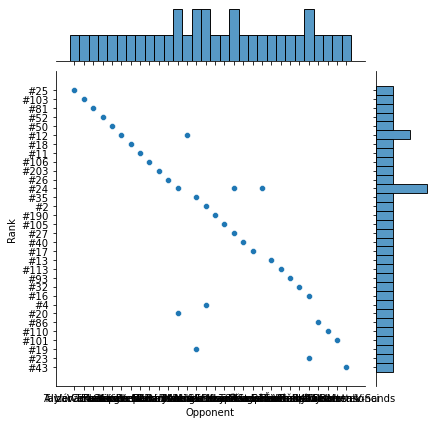

In [48]:
sns.jointplot(x='Opponent', y='Rank', data=df6)

sns.jointplot(x='Opponent', y='Result', data=df3)

<AxesSubplot:xlabel='Result', ylabel='Year'>

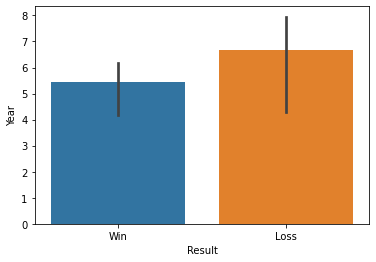

In [77]:
sns.barplot(x='Result', y='Year', data = df4, estimator=np.std)

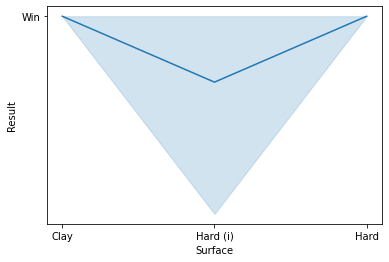

In [108]:
line_plot = sns.lineplot(x='Surface', y='Result', data=df5)
fig = line_plot.get_figure()
fig.savefig('my_lineplot.png')  

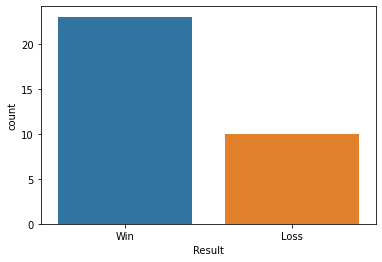

In [100]:
count_plot= sns.countplot(x='Result', data = df4)
fig = count_plot.get_figure()
fig.savefig('count_winplot.png')

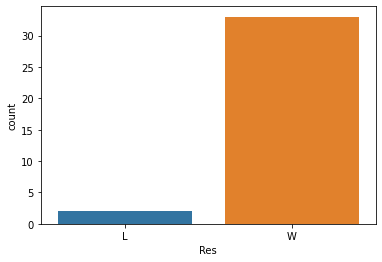

In [102]:
count_plot= sns.countplot(x='Res', data = df6)
fig = count_plot.get_figure()
fig.savefig('count_winplot.png')

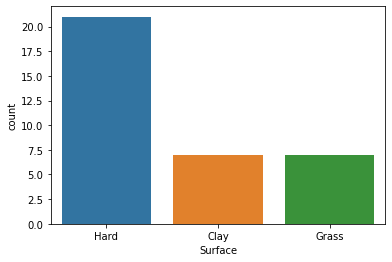

In [103]:

count_plot= sns.countplot(x='Surface', data = df6)
fig = count_plot.get_figure()
fig.savefig('count_winplot2.png')

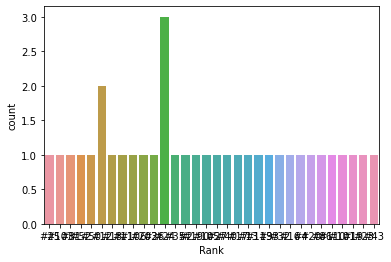

In [104]:
count_plot= sns.countplot(x='Rank', data = df6)
fig = count_plot.get_figure()
fig.savefig('count_winplotR.png')

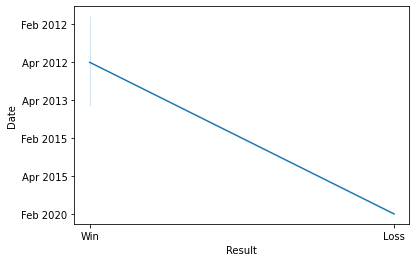

In [105]:
line_plot = sns.lineplot(x='Result',y = 'Date', data = df5)
fig = line_plot.get_figure()
fig.savefig('my_lineplot.png')  